In [1]:

import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [6]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [12]:
df['Age'].fillna(df['Age'].mean(),inplace=True)


In [10]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [13]:
df

,Survived,Age,Fare
0,0,22.000000,7.2500
1,1,38.000000,71.2833
2,1,26.000000,7.9250
3,1,35.000000,53.1000
4,0,35.000000,8.0500
...,...,...,...
886,0,27.000000,13.0000
887,1,19.000000,30.0000
888,0,29.699118,23.4500
889,1,26.000000,30.0000


In [22]:
x=df.iloc[:,1:]
y=df.iloc[:,0:1]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

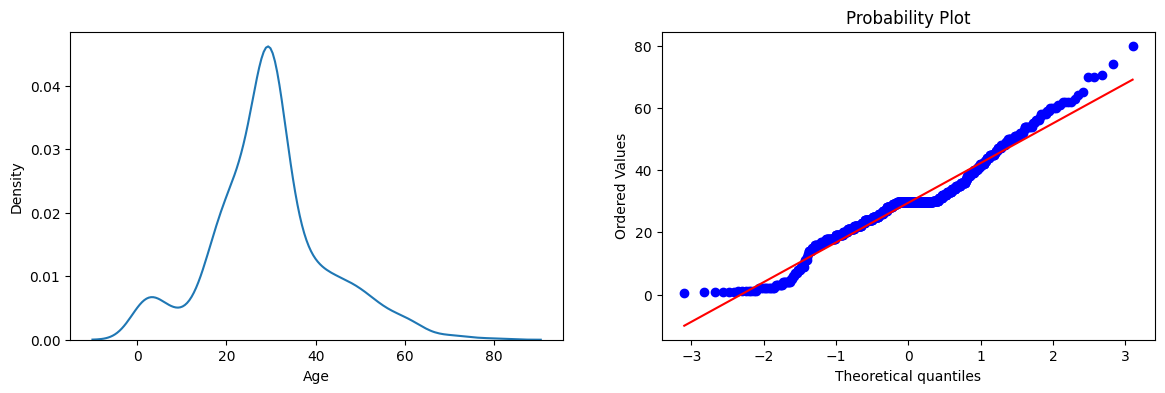

In [40]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(X_train['Age'])


plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.show()



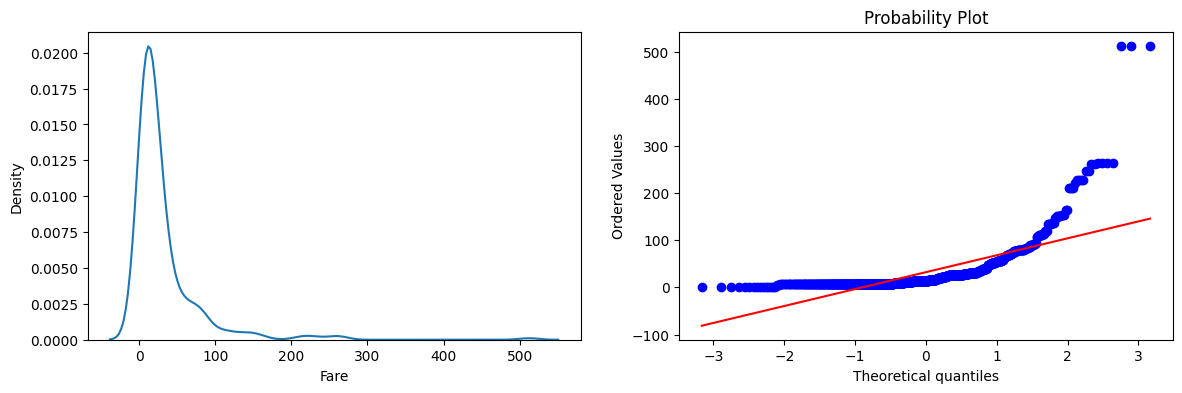

In [44]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(df['Fare'])

plt.subplot(122)
stats.probplot(df['Fare'], dist='norm',plot=plt)

plt.show()

In [45]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [46]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
    
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

C:\Users\sahad\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6759776536312849


In [48]:
trf=FunctionTransformer(func=np.log1p)

In [49]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [50]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

C:\Users\sahad\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6927374301675978


Text(0.5, 1.0, 'Fare After Log')

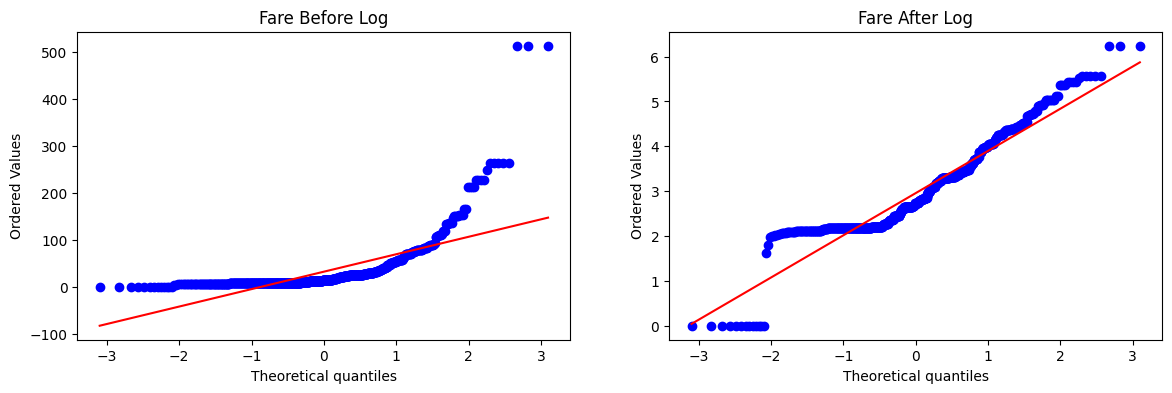

In [52]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)


Text(0.5, 1.0, 'Fare After Log')

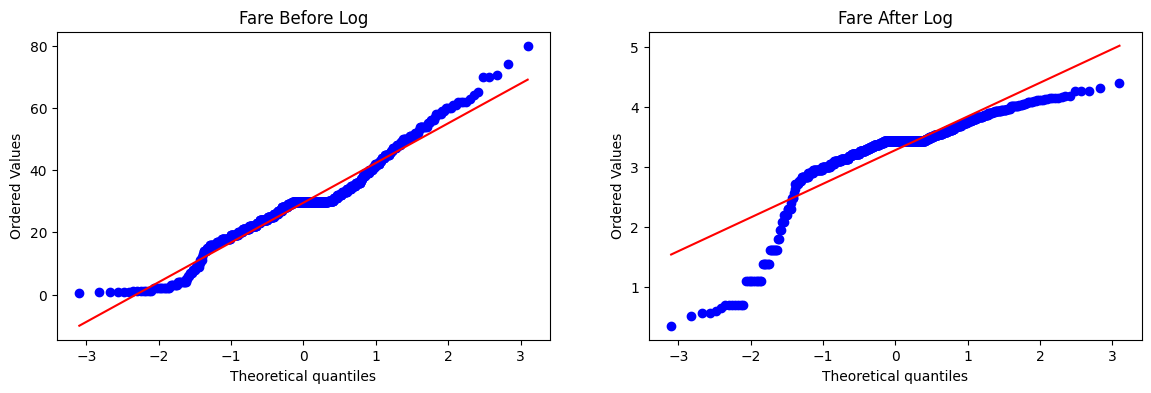

In [53]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Fare After Log')


In [54]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6431335830212235


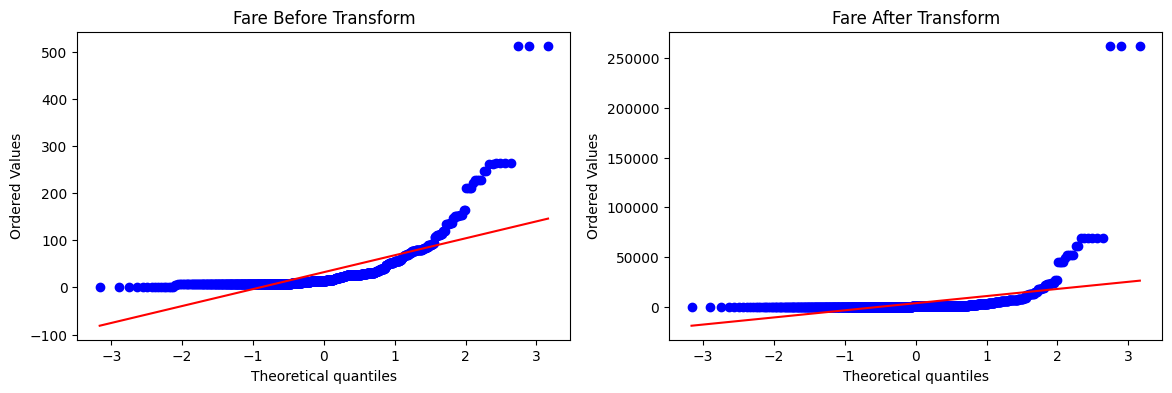

In [56]:
apply_transform(lambda x:x**2)

Accuracy 0.6195131086142323


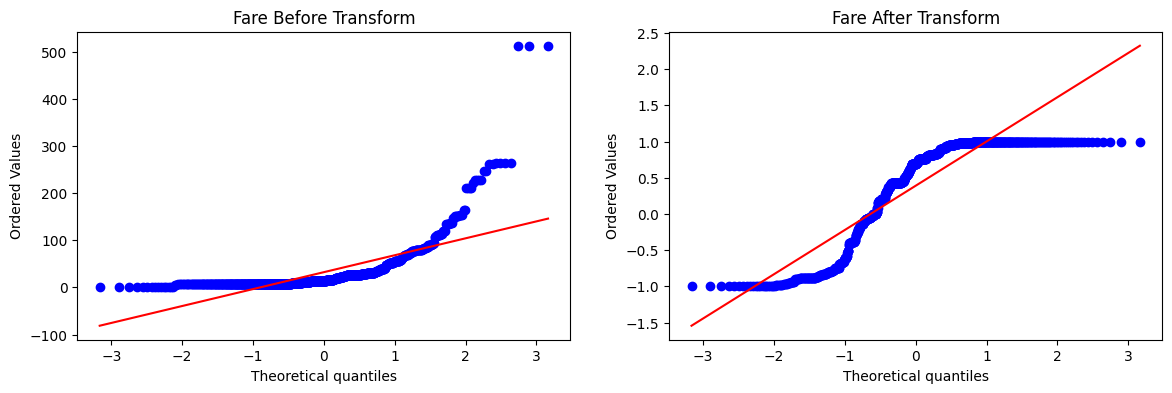

In [64]:
apply_transform(np.sin)